In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
heart_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearningCourseWithPython/data/heart.csv')

In [6]:
heart_data.shape

(303, 14)

In [7]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [11]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
heart_data['target'].value_counts()

,count
target,
1,165
0,138


In [13]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [14]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [15]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [18]:
model = LogisticRegression()

In [19]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [21]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8512396694214877


In [22]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [23]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.819672131147541


In [25]:
# input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)
input_data =(64,1,3,110,211,0,0,144,1,1.8,1,0,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [34]:

"""Heart Disease Prediction with Multiple Models and Grid Search"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [35]:
# -------------------------------
# 1️⃣ Load Data
# -------------------------------
heart_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearningCourseWithPython/data/heart.csv')

print("Dataset Shape:", heart_data.shape)
print(heart_data.head())
print(heart_data.info())
print(heart_data.isnull().sum())
print(heart_data['target'].value_counts())


Dataset Shape: (303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      30

In [36]:

# -------------------------------
# 2 Split features and target
# -------------------------------
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=2
)

In [37]:
# -------------------------------
# 3 Define models and parameter grids
# -------------------------------
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC()
}

In [40]:
# Logistic Regression grid needs solver/penalty combinations handled
logreg_params = [
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C':[0.01,0.1,1,10,100], 'max_iter':[100,500,1000], 'class_weight':['balanced', None]},
    {'solver': ['lbfgs'], 'penalty': ['l2'], 'C':[0.01,0.1,1,10,100], 'max_iter':[100,500,1000], 'class_weight':['balanced', None]}
]


rf_params = {
    'n_estimators':[50,100,200],
    'max_depth':[None,5,10],
    'min_samples_split':[2,5,10]
}

svm_params = {
    'C':[0.1,1,10],
    'kernel':['linear','rbf'],
    'class_weight':[None,'balanced']
}

param_grids = {
    'LogisticRegression': logreg_params,
    'RandomForest': rf_params,
    'SVM': svm_params
}


In [41]:
# -------------------------------
# 4 Grid Search for all models
# -------------------------------
best_models = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    grid = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, Y_train)

    best_models[model_name] = grid.best_estimator_

    print(f"Best params for {model_name}: {grid.best_params_}")
    print(f"Training Accuracy: {accuracy_score(Y_train, grid.predict(X_train)):.4f}")
    print(f"Test Accuracy: {accuracy_score(Y_test, grid.predict(X_test)):.4f}")

# -------------------------------


Training LogisticRegression...
Best params for LogisticRegression: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Training Accuracy: 0.8512
Test Accuracy: 0.8361

Training RandomForest...
Best params for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Training Accuracy: 1.0000
Test Accuracy: 0.7869

Training SVM...
Best params for SVM: {'C': 10, 'class_weight': None, 'kernel': 'linear'}
Training Accuracy: 0.8595
Test Accuracy: 0.8033


In [42]:
# 5 Pick best model based on test accuracy
# -------------------------------
best_model_name = max(best_models, key=lambda x: accuracy_score(Y_test, best_models[x].predict(X_test)))
best_model = best_models[best_model_name]

print("\nBest Model:", best_model_name)
print("Test Accuracy:", accuracy_score(Y_test, best_model.predict(X_test)))



Best Model: LogisticRegression
Test Accuracy: 0.8360655737704918


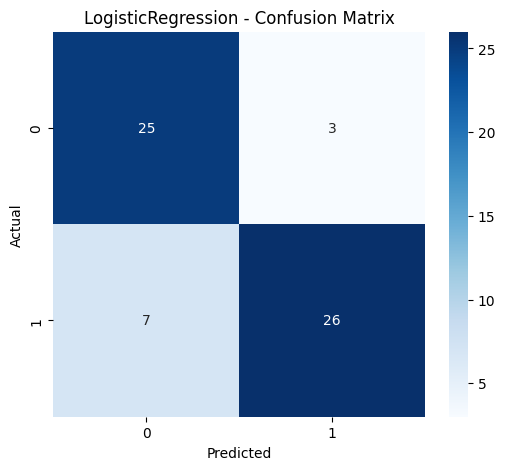

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        28
           1       0.90      0.79      0.84        33

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [43]:
# -------------------------------
# 6 Confusion Matrix & Classification Report
# -------------------------------
Y_pred = best_model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'{best_model_name} - Confusion Matrix')
plt.show()

print(classification_report(Y_test, Y_pred))

In [44]:
# -------------------------------
# 7 Feature Importance (Random Forest only)
# -------------------------------
if hasattr(best_model, 'feature_importances_'):
    importance = best_model.feature_importances_
    features = X.columns
    plt.figure(figsize=(10,6))
    sns.barplot(x=importance, y=features)
    plt.title('Feature Importance')
    plt.show()


In [46]:
# Example input
input_data = (64,1,3,110,211,0,0,144,1,1.8,1,0,2)

# Convert to DataFrame using same columns as training data
input_df = pd.DataFrame([input_data], columns=X.columns)

# Predict
prediction = best_model.predict(input_df)

if prediction[0] == 0:
    print("The Person does NOT have Heart Disease")
else:
    print("The Person HAS Heart Disease")


The Person HAS Heart Disease
